## Import Libraries

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

## Load the dataset


In [4]:
Data = load_wine()
type(Data)

sklearn.utils._bunch.Bunch

In [5]:
#Bunch object and attributes that can be accessed
Data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [6]:
#number of samples available
print(Data.data.shape)
print(Data.target.shape)

(178, 13)
(178,)


In [7]:
x = Data.data
y = Data.target

In [8]:
#number of classifies
Data.target_names 

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
#names of the features
Data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [11]:
#devide the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)


(124, 13) (124,) (54, 13) (54,)


### Normalize the data

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)


(124, 13) (124,) (54, 13) (54,)


## Model

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(12,activation="relu"),
    tf.keras.layers.Dense(3,activation="softmax")
]
)

### Compile the model

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')


### Training phase

In [20]:
r=model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 49ms/step - loss: 1.2769 - accuracy: 0.3548 - val_loss: 1.1475 - val_accuracy: 0.3519
Epoch 2/100
4/4 [==============================] - 0s 27ms/step - loss: 1.2262 - accuracy: 0.3468 - val_loss: 1.1010 - val_accuracy: 0.3519
Epoch 3/100
4/4 [==============================] - 0s 29ms/step - loss: 1.1758 - accuracy: 0.3548 - val_loss: 1.0559 - val_accuracy: 0.4074
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 1.1275 - accuracy: 0.3548 - val_loss: 1.0127 - val_accuracy: 0.4259
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 1.0830 - accuracy: 0.3629 - val_loss: 0.9710 - val_accuracy: 0.4444
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 1.0390 - accuracy: 0.3790 - val_loss: 0.9310 - val_accuracy: 0.4444
Epoch 7/100
4/4 [==============================] - 0s 21ms/step - loss: 0.9986 - accuracy: 0.4194 - val_loss: 0.8931 - val_accuracy: 0.4815
Epoch 8/100
4/4 [===

### evaluate the model, returns loss and accuracy

In [21]:
print("Train score: ",model.evaluate(x_train,y_train))
print("Test score: ",model.evaluate(x_test,y_test))


4/4 [==============================] - 0s 3ms/step - loss: 0.1052 - accuracy: 0.9839
Train score:  [0.10520553588867188, 0.9838709831237793]
2/2 [==============================] - 0s 7ms/step - loss: 0.1106 - accuracy: 0.9815
Test score:  [0.110613152384758, 0.9814814925193787]


### Plot the training phase

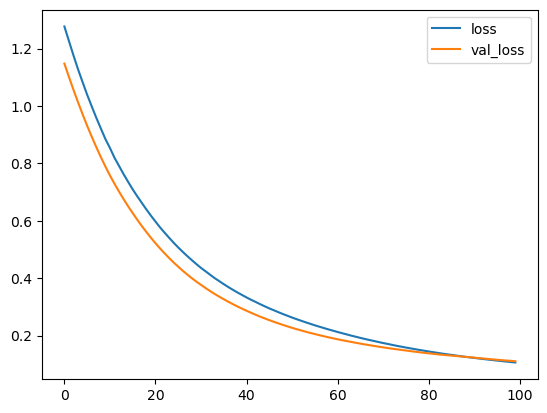

In [22]:
plt.plot(r.history['loss'],label="loss")
plt.plot(r.history['val_loss'],label="val_loss")
plt.legend()

### Plot accuracy

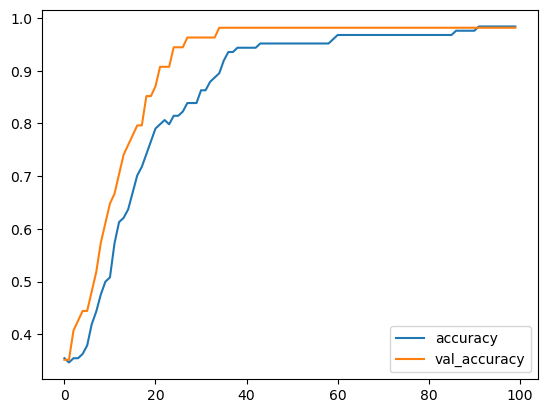

In [23]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()


## Make predictions


In [24]:
P=model.predict(x_test)

2/2 [==============================] - 0s 5ms/step


In [25]:
print(P)

[[9.4136798e-01 4.8096180e-02 1.0535865e-02]
 [8.9223635e-01 1.0424130e-01 3.5224459e-03]
 [9.7910988e-01 2.0341497e-02 5.4855156e-04]
 [9.8967195e-01 1.0301404e-02 2.6651951e-05]
 [6.4479103e-03 9.8576152e-01 7.7904854e-03]
 [8.1881136e-01 1.6894145e-01 1.2247150e-02]
 [5.6503541e-03 9.9157435e-01 2.7753313e-03]
 [9.2356020e-01 7.6134488e-02 3.0534962e-04]
 [6.1552119e-02 7.5664794e-01 1.8179989e-01]
 [7.9265349e-03 2.7493413e-03 9.8932415e-01]
 [2.9522000e-02 2.7329503e-02 9.4314849e-01]
 [9.9561465e-01 4.2750281e-03 1.1034225e-04]
 [8.6701335e-03 4.3047736e-03 9.8702514e-01]
 [5.0040882e-02 9.1233754e-01 3.7621584e-02]
 [7.9454571e-01 1.7718108e-01 2.8273202e-02]
 [9.7119540e-01 2.8373664e-02 4.3087796e-04]
 [5.0251451e-03 6.2598484e-03 9.8871499e-01]
 [3.0747004e-02 9.5517701e-01 1.4075968e-02]
 [7.8960536e-03 9.8948634e-01 2.6176232e-03]
 [8.3442880e-03 8.8420697e-03 9.8281360e-01]
 [9.7772741e-01 2.0184543e-02 2.0880979e-03]
 [5.9275769e-02 9.3957382e-01 1.1504266e-03]
 [9.692477

In [26]:
P.shape

(54, 3)

### Calculate the predicted class indices for each example using argmax

In [27]:
Predictions=np.argmax(P,axis=1)
print(Predictions)
Predictions.shape


[0 0 0 0 1 0 1 0 1 2 2 0 2 1 0 0 2 1 1 2 0 1 0 2 2 1 1 2 1 1 1 0 2 1 1 0 1
 0 2 1 2 2 0 1 1 1 1 2 0 2 2 2 1 1]


(54,)

In [28]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2, 2, 0, 1,
       1, 1, 1, 2, 0, 2, 2, 2, 1, 1])

In [29]:
#crosscheckaccuracy
print("manual calculation of accuracy:", np.mean(Predictions == y_test))
print("evaluation of output:", model.evaluate(x_test, y_test ))

manual calculation of accuracy: 0.9814814814814815
2/2 [==============================] - 0s 5ms/step - loss: 0.1106 - accuracy: 0.9815
evaluation of output: [0.110613152384758, 0.9814814925193787]


### Missclassified examples

In [30]:
misclassified_indices = np.where(Predictions != y_test)[0]
misclassified_examples = x_test[misclassified_indices]
print(misclassified_examples)



[[-0.04319076 -0.56928424  0.76734406  3.13388653  2.86559396  1.56995268
   0.83634896 -1.19199844  0.59440165 -0.73772917  1.6069733   1.19942205
   0.73904897]]


## Plot confusion matrix

1/2 [==============>...............] - ETA: 0s

2/2 [==============================] - 0s 4ms/step
Confusion matrix, without normalisation
[[15  0  0]
 [ 1 22  0]
 [ 0  0 16]]


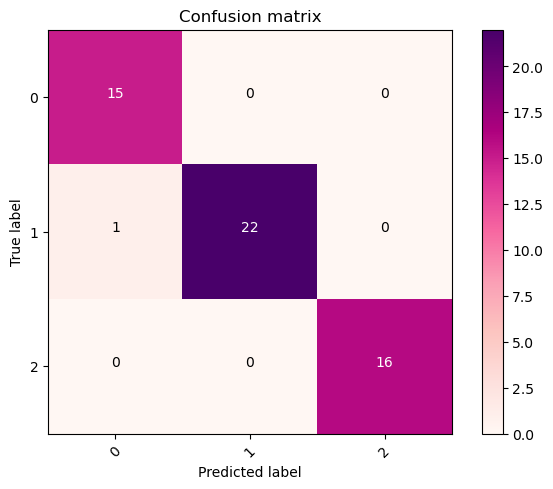

In [32]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.RdPu):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalised confusion matrix")
  else:
    print("Confusion matrix, without normalisation")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt),
        horizontalalignment='center',
        color="white" if cm[i, j] > thresh else "black")




p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(3)))

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()